accuracy on testing set: 0.8
accuracy on testing set: 0.77
accuracy on testing set: 0.81
accuracy on testing set: 0.83
accuracy on testing set: 0.8
accuracy on testing set: 0.83


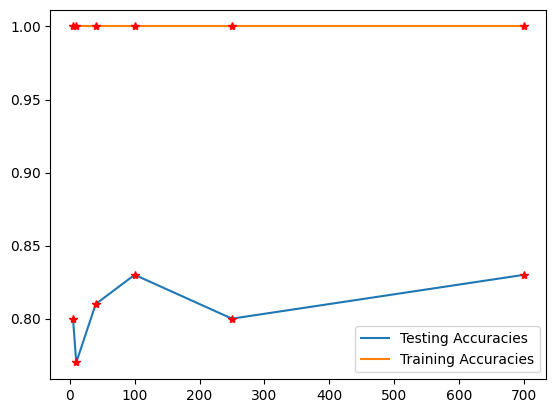

In [2]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, datasets, tree


data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

testingAccuracies = []
trainingAccuracies = []

featureNums = (5, 10, 40, 100, 250, 700)

target = df["class"]

variables = []

for i in df.columns:
    variables.append(i)


X = df.copy()
X = X.drop('class', axis = 1)


for i in featureNums:

    newData = SelectKBest(score_func = mutual_info_classif, k = i).fit_transform(X, target)

    newData.shape

    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size = 0.30, stratify = target, random_state = 1)
    predictor = tree.DecisionTreeClassifier()
    predictor.fit(X_train, y_train)

    y_predTesting = predictor.predict(X_test)
    y_predTraining = predictor.predict(X_train)

    testingAccuracies.append(round(metrics.accuracy_score(y_test, y_predTesting), 2))

    trainingAccuracies.append(round(metrics.accuracy_score(y_train, y_predTraining), 2))

    #accuracies.append([i, round(metrics.accuracy_score(y_test, y_predTesting), 2), round(metrics.accuracy_score(y_train, y_predTraining), 2)])

    print("accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_predTesting),2))

    #figure = plt.figure(figsize=(1.2, 0.6))
    #tree.plot_tree(predictor, feature_names = variables, class_names="class", impurity=False)
    #plt.show()



#newDf = pd.DataFrame(accuracies, columns = ["Features", "Testing", "Training"])

#newDf

#sns.boxplot(x = "Features", y = "Testing", data = newDf)

plt.plot(featureNums, testingAccuracies, label = "Testing Accuracies")

plt.plot(featureNums, trainingAccuracies, label = "Training Accuracies")

for i in range(0, len(featureNums)):
    plt.plot(featureNums[i],testingAccuracies[i], 'r*')
    plt.plot(featureNums[i],trainingAccuracies[i], 'r*')

plt.legend()
plt.show()

#sns.boxplot(x = "Features", y = "Training", data = newDf)

#for i in range(0, len(accuracyVecTesting)):

   # sns.pairplot(df, hue='class', height=2)
    

#x_train, x_test, y_train, y_test = train_test_split(df, target,test_size = 0.30)

#df.value_counts("class")

#sns.countplot(x='class', data=df)
#plt.show()